## 1 | Description and objective 

#### Description 

This dataset come from Kaggle https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information abou- Customers who left within the last month, the column is called Churn

- Services that each customer has signed up for phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information: how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers: gender, age range, and if they have partners and dependents


#### Objective: 

##### We are looking for findings what are the factors that have drive consumers who left within the last month. In order is to create a strategy to identify these consumers in order to retain them as customers
endents

## <span style= "color:green" > 2 | Exploratory data analysis </span>

### <span style= "color:green" >2.1 | Data Exploration </span>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

from  scipy.stats import chi2_contingency  
from scipy.stats.contingency import association


In [3]:
customer_data=pd.read_csv("Telco_Customer_Churn.csv")

In [4]:
customer_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
# Number of rows and columns 
print( "number of rows:{}". format(customer_data.shape[0]), "\nNumber of columns:{}".format(customer_data.shape[1]))

#Checking columns names, data types and counts
data_types=customer_data.dtypes
data_counts=customer_data.count()

data= pd.concat([data_types, data_counts], axis=1).reset_index()
data= data.rename(columns={'index': 'Columns names', 0: "Types", 1:'Counts'})

print("\nData types:\n{}".format(data))

number of rows:7043 
Number of columns:21

Data types:
       Columns names    Types  Counts
0         customerID   object    7043
1             gender   object    7043
2      SeniorCitizen    int64    7043
3            Partner   object    7043
4         Dependents   object    7043
5             tenure    int64    7043
6       PhoneService   object    7043
7      MultipleLines   object    7043
8    InternetService   object    7043
9     OnlineSecurity   object    7043
10      OnlineBackup   object    7043
11  DeviceProtection   object    7043
12       TechSupport   object    7043
13       StreamingTV   object    7043
14   StreamingMovies   object    7043
15          Contract   object    7043
16  PaperlessBilling   object    7043
17     PaymentMethod   object    7043
18    MonthlyCharges  float64    7043
19      TotalCharges   object    7043
20             Churn   object    7043


In [6]:
# number of unique value 
customer_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
# Print unique value
for col in customer_data.columns:
    print(col, customer_data[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [8]:
#Checking Null values 
customer_data.isnull().values.any()

False

These dataset contains 7043 rows and 21 columns. There are 3 numericals variables and 18 categoricals variables.
The column 'SeniorCitizen' has 2 unique values (0 - 1) but considered as an interger. 
The column 'TotalCharges' indicates the customer’s total charges, calculated to the end of the quarter specified above is a string but the column must be defined as an integer 


### <span style= "color:green" >2.2 | Data Cleanning </span>

In [29]:
df=customer_data.copy()

In [30]:
#Sniker case for column
df.columns=df.columns.str.lower()
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [31]:
df['seniorcitizen']=df['seniorcitizen'].astype('string')
df['seniorcitizen'].dtypes

string[python]

In [32]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'].dtypes

dtype('float64')

In [33]:
# Checking Null Values after transformation
df['totalcharges'].isnull().sum()

11

In [34]:
# totalcharges columns contains 11 Null values: let's Drop
df.dropna()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [36]:
df['paymentmethod']=df['paymentmethod'].replace({'Bank transfer (automatic)':'Automatic',
                                                 'Credit card (automatic)':'Automatic'})


### <span style= "color:green" >2.3 | Data Statistics and vizualisations </span>

In [38]:
cat=df.select_dtypes(exclude="number")
num= df.select_dtypes(include="number")

In [39]:
round(num.describe(),2)

,tenure,monthlycharges,totalcharges
count,7043.00,7043.00,7032.00
mean,32.37,64.76,2283.30
std,24.56,30.09,2266.77
min,0.00,18.25,18.80
25%,9.00,35.50,401.45
50%,29.00,70.35,1397.48
75%,55.00,89.85,3794.74
max,72.00,118.75,8684.80


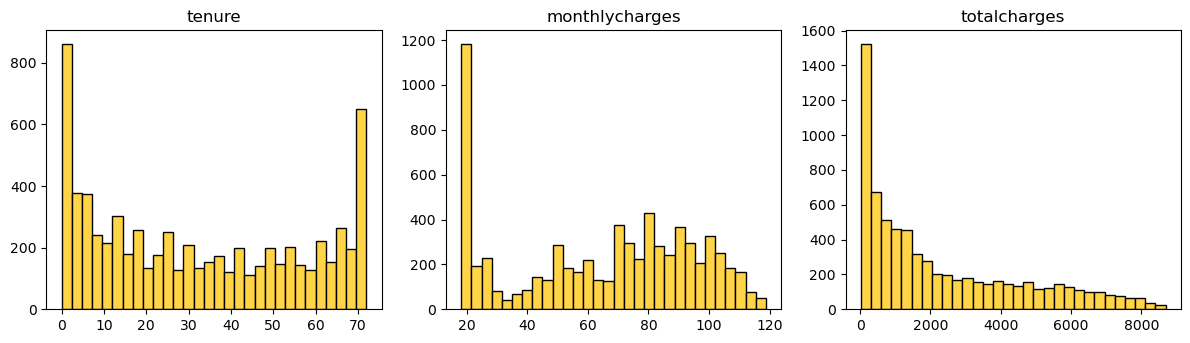

In [40]:
color = '#ffd447'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

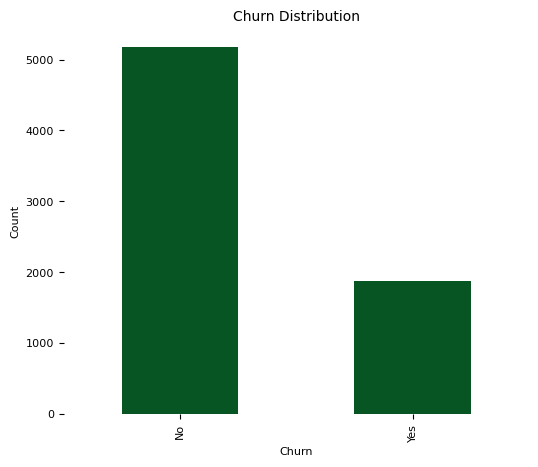

In [41]:
# Churn Distribution 

value_counts = df['churn'].value_counts()

fig, ax = plt.subplots(figsize=(6, 5))
value_counts.plot(kind='bar',color='#065522', ax=ax)


# Remove all spines (borders)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("Churn Distribution",fontsize=10)
ax.set_xlabel("Churn", fontsize=8)
ax.set_ylabel("Count",fontsize=8)

ax.tick_params(axis='both', labelsize=8)  # Adjust label size for both axes

#### Montly charges and churn

In [42]:
df_Montly_char_churn= df.groupby('churn')["monthlycharges"].agg(['count','min', 'mean', 'median', 'max', 'std'])
df_Montly_char_churn=df_Montly_char_churn.transpose()
round(df_Montly_char_churn,2)

churn,No,Yes
count,5174.00,1869.00
min,18.25,18.85
mean,61.27,74.44
median,64.43,79.65
max,118.75,118.35
std,31.09,24.67


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


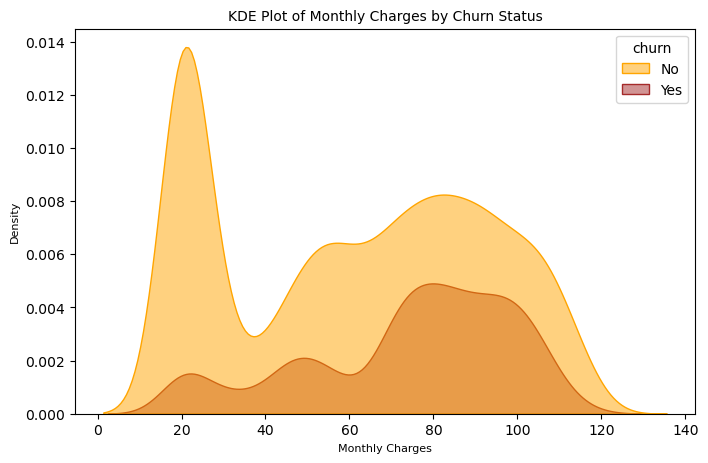

In [48]:
plt.figure(figsize=(8, 5))  

sns.kdeplot(data=df, x='monthlycharges', hue='churn', fill=True, 
            palette={'Yes': 'brown', 'No': 'orange'},
           alpha=0.5, linewidth=1.0)  # Custom colors for categories


plt.title('KDE Plot of Monthly Charges by Churn Status', fontsize=10)
plt.xlabel('Monthly Charges', fontsize=8)
plt.ylabel('Density', fontsize=8)



plt.show()

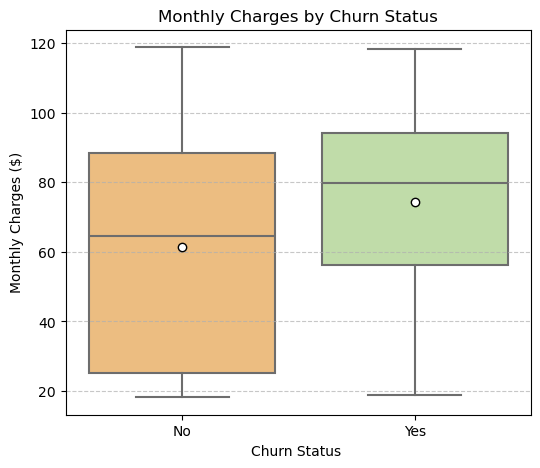

In [50]:
plt.figure(figsize=(6, 5))  # Adjust figure size
sns.boxplot(
    data=df, x='churn', y="monthlycharges", 
    palette="Spectral",  # More distinct color palette
    showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    flierprops={"marker": "o", "markersize": 5, "markerfacecolor": "red", "alpha": 0.5}
)

# Add title and labels
plt.title("Monthly Charges by Churn Status", fontsize=12)
plt.xlabel("Churn Status ", fontsize=10)
plt.ylabel("Monthly Charges ($)", fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)  # Add a light grid for readability

plt.show()


In Average, the monthly charges of total customers is 70,35$.
The average amount is different beetween Churn status. Non Churned Customers  paid in average 61,27 and churned customers paid 74,44.

#### tenure by churn

In [51]:
df_tenure_churn= df.groupby('churn')["tenure"].agg(['count','min', 'mean', 'median', 'max', 'std'])
df_tenure_churn=df_tenure_churn.transpose()
round(df_tenure_churn,2)

churn,No,Yes
count,5174.00,1869.00
min,0.00,1.00
mean,37.57,17.98
median,38.00,10.00
max,72.00,72.00
std,24.11,19.53


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


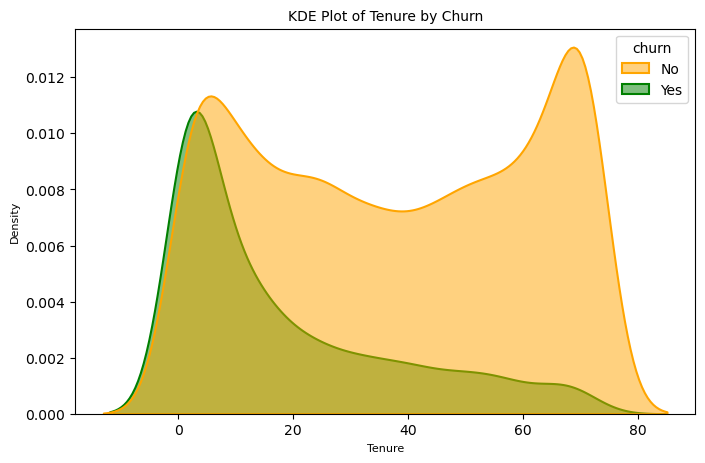

In [52]:
plt.figure(figsize=(8, 5))  

sns.kdeplot(data=df, x='tenure', hue='churn', fill=True, 
            palette={'Yes': 'green', 'No': 'orange'},
           alpha=0.5, linewidth=1.5)  # Custom colors for categories


plt.title('KDE Plot of Tenure by Churn', fontsize=10)
plt.xlabel('Tenure', fontsize=8)
plt.ylabel('Density', fontsize=8)



plt.show()

the median tenure of Churned Customers is 10 months. That's mean that 50% of churned people have very low tenure (0-10 months).
This suggests that customers who leave tend to do so early in their contract.
The probability of churn decreases significantly as tenure increases.

The distribution is bimodal for Non-Churned Customers: there is 2 peaks. First peak (around 5-10 months): Some customers stay short-term but don’t churn.
Second peak (around 70+ months): Many customers stay long-term and rarely churn.

#### Contract by churn

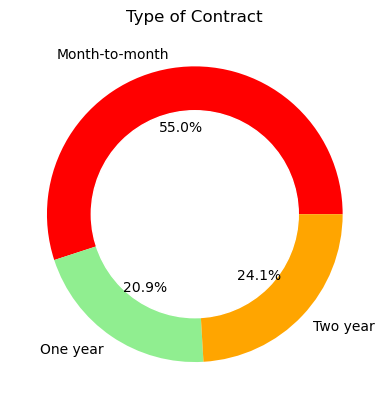

In [64]:
Contract_counts = crosstab_result.sum(axis=0)

# Create a pieplot
plt.pie(
    Contract_counts, 
    labels=Contract_counts.index, 
    autopct='%1.1f%%',
    colors=['red', 'lightgreen','orange']
)



# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Type of Contract")

plt.show()

In [78]:
crosstab_result = pd.crosstab(df['churn'], df['contract'], normalize=True)*100
round(crosstab_result,2).transpose()

churn,No,Yes
contract,,
Month-to-month,31.52,23.50
One year,18.56,2.36
Two year,23.38,0.68


#### Churn and paymentmethod

In [54]:
crosstab_result1 = pd.crosstab(df['churn'], df['paymentmethod'])
crosstab_result1.transpose()

churn,No,Yes
paymentmethod,,
Automatic,2576,490
Electronic check,1294,1071
Mailed check,1304,308


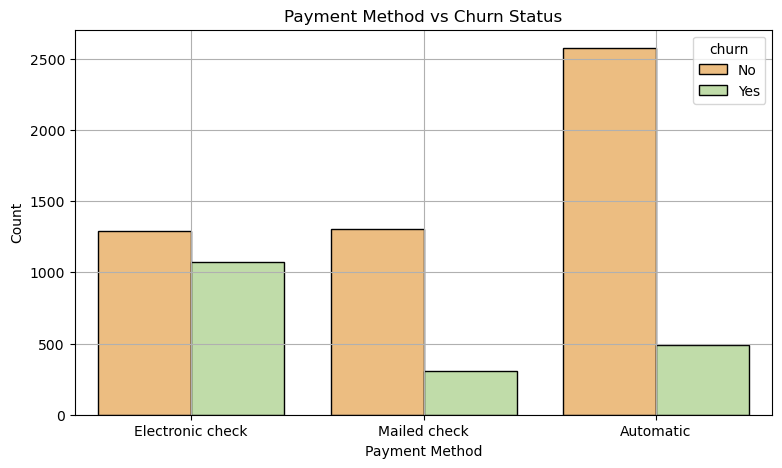

In [55]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='paymentmethod', hue='churn', palette='Spectral', edgecolor='black')

plt.title('Payment Method vs Churn Status')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.grid(True)
plt.show()

 Customers who paid their bill by using automatic method are less likely to unsubscribe. The proportion of churned customers is higher when payment method is electronic check 

People who has aquired month to month contact, their leaving and staying rate isn't very much different.
But people with one year or two year contract their staying rate is much higher than leaving.

### <span style= "color:green" >2.4 | Correlation </span>

In [60]:
# Relationships and interactions between 'Churn' and 'contract'
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result)

if chi2_pvalue < 0.05:
    print(f'The null hypothesis of the Chi-square test is that the categorical variables Churn and contract are independent.\nThe p-value is {chi2_pvalue} that implies there is a significant association between Churn and contract.')
else:
    pint(f'The null hypothesis of the Chi-square test is that the categorical variables Churn and contract are independent.\nThe p-value is {chi2_pvalue}there is not enough evidence to conclude a significant association between Churn and contract.')


The null hypothesis of the Chi-square test is that the categorical variables Churn and contract are independent.
The p-value is 5.863038300673391e-258 that implies there is a significant association between Churn and contract.


In [61]:
# Relationships and interactions between 'Churn' and 'paymentmethod'
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result1)


if chi2_pvalue < 0.05:
    print(f'The null hypothesis of the Chi-square test is that the categorical variables Churn and paymentmethod are independent.\nThe p-value is {chi2_pvalue} that implies there is a significant association between Churn and paymentmethod.')
else:
    pint(f'The null hypothesis of the Chi-square test is that the categorical variables Churn and paymentmethod are independent.\nThe p-value is {chi2_pvalue}there is not enough evidence to conclude a significant association between Churn and paymentmethod.')

The null hypothesis of the Chi-square test is that the categorical variables Churn and paymentmethod are independent.
The p-value is 2.762798590247217e-141 that implies there is a significant association between Churn and paymentmethod.


### Feature engineering

In [65]:
df_encoding=df.copy()

In [66]:
df_encoding['seniorcitizen']=pd.to_numeric(df['seniorcitizen'], errors='coerce')

In [67]:
# Binary encoding.
df_encoding['partner']=df_encoding['partner'].replace({"No":0, "Yes":1})
df_encoding['churn'] = df_encoding['churn'].replace({'No': 0, 'Yes': 1})
df_encoding['dependents'] = df_encoding['dependents'].replace({'No':0, 'Yes': 1})

df_encoding['internetservice'] = df_encoding['internetservice'].replace({'No': 0, 'DSL': 1, 'Fiber optic':2 })
df_encoding['contract'] = df_encoding['contract'].replace({'Month-to-month':0, 'One year':1, 'Two year':2})
df_encoding['paymentmethod'] = df_encoding['paymentmethod'].replace({'Electronic check':0, 'Mailed check':1, 'Automatic':2})
df_encoding['paperlessbilling'] = df_encoding['dependents'].replace({'No': 0, 'Yes': 1})
df_encoding['gender'] = df_encoding['gender'].replace({'Female':0, 'Male':1})



df_encoding['phoneservice'] = df_encoding['phoneservice'].replace({'No': 0, 'Yes': 1})
df_encoding['multiplelines'] = df_encoding['multiplelines'].replace({'No phone service': 1, 'No':2, 'Yes': 3})
df_encoding['onlinesecurity'] = df_encoding['onlinesecurity'].replace({'No internet service': 1, 'No':2, 'Yes': 3})
df_encoding['onlinebackup'] = df_encoding['onlinebackup'].replace({'No internet service': 1, 'No':2, 'Yes': 3})
df_encoding['deviceprotection'] = df_encoding['deviceprotection'].replace({'No internet service': 1, 'No':2, 'Yes': 3})
df_encoding['techsupport'] = df_encoding['techsupport'].replace({'No internet service': 1, 'No':2, 'Yes': 3})
df_encoding['streamingtv'] = df_encoding['streamingtv'].replace({'No internet service': 1, 'No':2, 'Yes': 3})
df_encoding['streamingmovies'] = df_encoding['streamingmovies'].replace({'No internet service': 1, 'No':2, 'Yes': 3})


In [68]:
df_encoding=df_encoding.drop('customerid',axis=1)

In [69]:
df_encoding.dtypes

gender                int64
seniorcitizen         Int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines         int64
internetservice       int64
onlinesecurity        int64
onlinebackup          int64
deviceprotection      int64
techsupport           int64
streamingtv           int64
streamingmovies       int64
contract              int64
paperlessbilling      int64
paymentmethod         int64
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [70]:
df_encoding.head(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,1,0,1,0,1,1,2,3,2,2,2,2,0,0,0,29.85,29.85,0
1,1,0,0,0,34,1,2,1,3,2,3,2,2,2,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,2,1,3,3,2,2,2,2,0,0,1,53.85,108.15,1
3,1,0,0,0,45,0,1,1,3,2,3,3,2,2,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,2,2,2,2,2,2,2,2,0,0,0,70.70,151.65,1


In [71]:
corr_churn=df_encoding.corr()['churn'].sort_values(ascending=False)
corr_churn

churn               1.000000
internetservice     0.316846
monthlycharges      0.193356
streamingtv         0.164673
streamingmovies     0.163220
seniorcitizen       0.150889
deviceprotection    0.084654
onlinebackup        0.074205
multiplelines       0.036310
techsupport         0.027037
onlinesecurity      0.023309
phoneservice        0.011942
gender             -0.008612
partner            -0.150448
dependents         -0.164221
paperlessbilling   -0.164221
totalcharges       -0.199484
paymentmethod      -0.282708
tenure             -0.352229
contract           -0.396713
Name: churn, dtype: float64

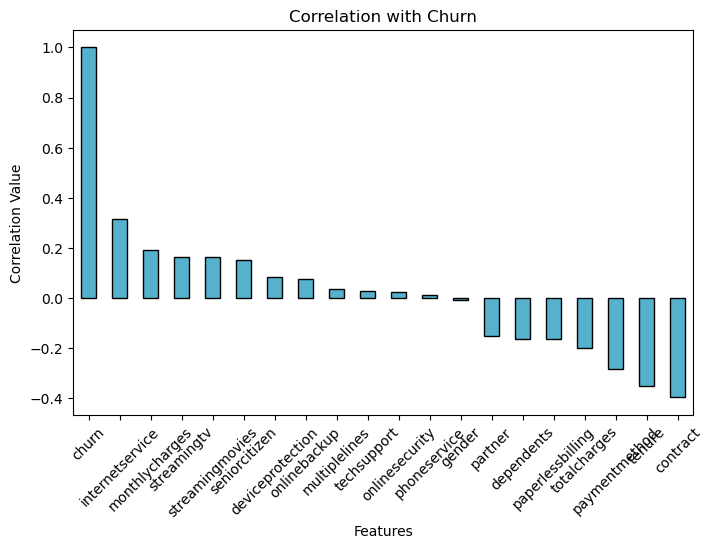

In [74]:
# Plot bar chart
fig,ax=plt.subplots(figsize=(8,5))

corr_churn.plot(kind='bar', color='#56b2cc', edgecolor='black',ax=ax)

plt.title("Correlation with Churn")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.xticks(rotation=45)  # Rotate labels for better visibility

plt.show()